In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib as plt
from datetime import date

# Import

In [2]:
data = pd.read_csv('../data/dax_indicator_2000_2024.csv')
data.head()

,Date,volume,direction_num,direction,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,2000-02-18,52728400,-10.610352,0,7488.993164,7580.244141,7411.770612,7541.144222,7519.901521,7420.779574,...,0,0,0,1,0,0,1,0,0,1
1,2000-02-21,24404000,22.189941,1,7548.209798,7572.339844,7464.497733,7557.462004,7533.371087,7441.179602,...,0,0,0,1,0,1,1,0,0,1
2,2000-02-22,51082700,27.560059,1,7581.613118,7555.376953,7503.074149,7573.995894,7547.660761,7461.092960,...,0,0,1,1,0,0,1,0,0,1
3,2000-02-23,42673800,79.140137,1,7590.749837,7554.861258,7534.216274,7590.967918,7562.730556,7480.672557,...,0,0,0,0,0,0,1,0,0,1
4,2000-02-24,38686700,-56.390137,0,7632.479980,7562.599888,7558.838449,7644.969066,7596.790471,7509.778912,...,0,0,0,1,0,0,1,0,0,1


In [3]:
data.drop('Date', axis=1, inplace=True)
data.head()

,volume,direction_num,direction,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,MACD_12_26_9,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,52728400,-10.610352,0,7488.993164,7580.244141,7411.770612,7541.144222,7519.901521,7420.779574,199.120827,...,0,0,0,1,0,0,1,0,0,1
1,24404000,22.189941,1,7548.209798,7572.339844,7464.497733,7557.462004,7533.371087,7441.179602,194.131292,...,0,0,0,1,0,1,1,0,0,1
2,51082700,27.560059,1,7581.613118,7555.376953,7503.074149,7573.995894,7547.660761,7461.092960,189.345973,...,0,0,1,1,0,0,1,0,0,1
3,42673800,79.140137,1,7590.749837,7554.861258,7534.216274,7590.967918,7562.730556,7480.672557,184.827846,...,0,0,0,0,0,0,1,0,0,1
4,38686700,-56.390137,0,7632.479980,7562.599888,7558.838449,7644.969066,7596.790471,7509.778912,186.443378,...,0,0,0,1,0,0,1,0,0,1


# X y validation Split

In [4]:
y = data[['direction']]
X = data.drop(['direction','direction_num'],axis=1) #

In [5]:
X.head()

,volume,sma_3,sma_7,sma_14,ema_3,ema_7,ema_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,pos_ema_14,pos_BBL_3_2.0,pos_BBM_3_2.0,pos_BBU_3_2.0,pos_BBL_7_2.0,pos_BBM_7_2.0,pos_BBU_7_2.0,pos_BBL_14_2.0,pos_BBM_14_2.0,pos_BBU_14_2.0
0,52728400,7488.993164,7580.244141,7411.770612,7541.144222,7519.901521,7420.779574,199.120827,-4.280509,203.401335,...,0,0,0,1,0,0,1,0,0,1
1,24404000,7548.209798,7572.339844,7464.497733,7557.462004,7533.371087,7441.179602,194.131292,-7.416034,201.547327,...,0,0,0,1,0,1,1,0,0,1
2,51082700,7581.613118,7555.376953,7503.074149,7573.995894,7547.660761,7461.092960,189.345973,-9.761083,199.107056,...,0,0,1,1,0,0,1,0,0,1
3,42673800,7590.749837,7554.861258,7534.216274,7590.967918,7562.730556,7480.672557,184.827846,-11.423367,196.251214,...,0,0,0,0,0,0,1,0,0,1
4,38686700,7632.479980,7562.599888,7558.838449,7644.969066,7596.790471,7509.778912,186.443378,-7.846269,194.289647,...,0,0,0,1,0,0,1,0,0,1


#### Imput the list of position columns

In [6]:
cat_col_names = pd.read_csv('../data/temp_cat_col_names.csv')
cat_col_names.drop('Unnamed: 0', axis=1, inplace=True)
cat_col_names = cat_col_names['0'].tolist()
cat_col_names

['pos_sma_3',
 'pos_sma_7',
 'pos_sma_14',
 'pos_ema_3',
 'pos_ema_7',
 'pos_ema_14',
 'pos_BBL_3_2.0',
 'pos_BBM_3_2.0',
 'pos_BBU_3_2.0',
 'pos_BBL_7_2.0',
 'pos_BBM_7_2.0',
 'pos_BBU_7_2.0',
 'pos_BBL_14_2.0',
 'pos_BBM_14_2.0',
 'pos_BBU_14_2.0']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=99, shuffle=False)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42, shuffle=False)

# Checking Shapes

In [9]:
X_train.shape, y_train.shape

((2976, 60), (2976, 1))

In [10]:
X_test.shape, y_test.shape

((1276, 60), (1276, 1))

In [11]:
X_val.shape, y_val.shape

((1823, 60), (1823, 1))

# Random Forest

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier

In [13]:
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train['direction'])

RandomForestClassifier()

In [14]:
y_train_pred = rfc.predict(X_train)
y_test_pred  = rfc.predict(X_test)
y_val_pred  = rfc.predict(X_val)

# Results

##  Confusion Matrix Train Set

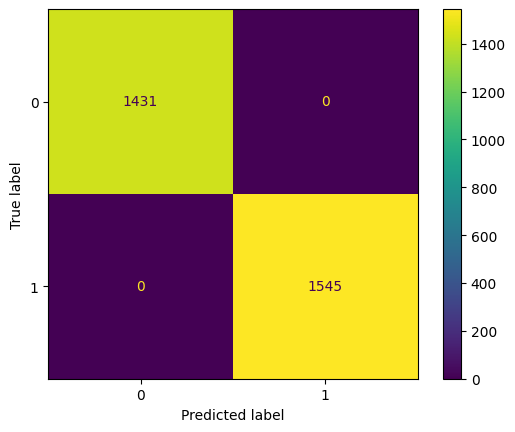

In [15]:
cm_train = confusion_matrix(y_train, y_train_pred)
cm_train
disp = ConfusionMatrixDisplay(cm_train, display_labels=rfc.classes_);
disp.plot()

## Confusion Matrix Test Set

[[500 117]
 [515 144]]


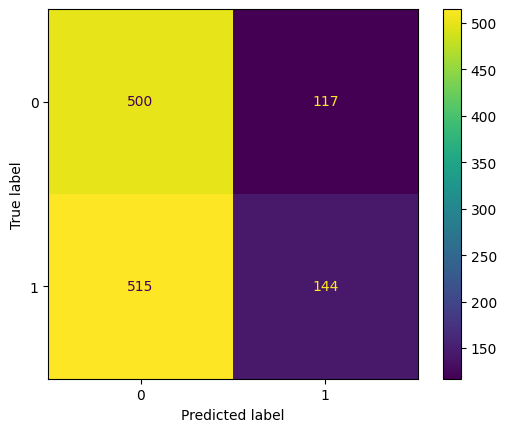

In [16]:
cm_test = confusion_matrix(y_test, y_test_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test,display_labels=rfc.classes_);
disp.plot()

## Confusion Matrix Validation Set

[[742 114]
 [866 101]]


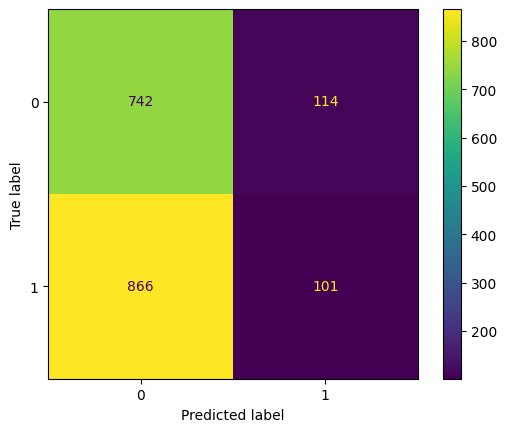

In [17]:
cm_test = confusion_matrix(y_val, y_val_pred)
print(cm_test)
disp = ConfusionMatrixDisplay(cm_test,display_labels=rfc.classes_);
disp.plot()

## Error Matrix

In [18]:
error_metric = pd.DataFrame({"Train":[accuracy_score(y_train, y_train_pred),f1_score(y_train,y_train_pred),
                                recall_score(y_train,y_train_pred),precision_score(y_train, y_train_pred),
                                cohen_kappa_score(y_train, y_train_pred)],
                                "Test":[accuracy_score(y_test, y_test_pred),f1_score(y_test,y_test_pred),
                                recall_score(y_test,  y_test_pred),precision_score(y_test, y_test_pred),
                                cohen_kappa_score(y_test, y_test_pred)],
                                "Val":[accuracy_score(y_val, y_val_pred),f1_score(y_val,y_val_pred),
                                recall_score(y_val,  y_val_pred),precision_score(y_val, y_val_pred),
                                cohen_kappa_score(y_val, y_val_pred)]},
                                index=["accuracy","F1","recall","precission","kappa"])

In [19]:
error_metric

,Train,Test,Val
accuracy,1.0,0.504702,0.462425
F1,1.0,0.313043,0.170897
recall,1.0,0.218513,0.104447
precission,1.0,0.551724,0.469767
kappa,1.0,0.028304,-0.027352


# Grid Search CV

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
grid = {'n_estimators': [50,100,150,200,250],
        'max_depth': [10,20,30,40],
        'min_samples_split': [2,10,20,30],
        'min_samples_leaf': [1,10,20]}

In [22]:
grid_search = GridSearchCV(estimator = rfc, param_grid = grid, cv = 5, n_jobs=-1, verbose=1)

In [23]:
grid_search.fit(X_train, y_train['direction'])

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, 40],
                         'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [2, 10, 20, 30],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=1)

In [24]:
grid_search.best_params_

{'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [25]:
grid_search.best_estimator_.score(X_test, y_test)

0.5219435736677116

# Cross Validation

In [26]:
rfc_gridsearch = RandomForestClassifier(**grid_search.best_params_)

rfc_gridsearch.fit(X_train, y_train['direction'])

RandomForestClassifier(max_depth=40, min_samples_split=10, n_estimators=50)

In [27]:
from sklearn.model_selection import cross_validate
results = cross_validate(rfc_gridsearch, X_train, y_train['direction'], cv = 10, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  10 | elapsed:    2.1s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.4s finished


In [28]:
results['test_score'].mean()

0.4311956251553567

In [29]:
imp = rfc_gridsearch.feature_importances_.tolist()
name = rfc_gridsearch.feature_names_in_.tolist()
pd.DataFrame({'name':name,'importances':imp}).sort_values('importances', ascending=False).head(10)

,name,importances
0,volume,0.037198
17,BBP_3_2.0,0.036667
16,BBB_3_2.0,0.034303
10,rsi_3,0.032316
26,BBB_14_2.0,0.031171
22,BBP_7_2.0,0.030904
21,BBB_7_2.0,0.030472
27,BBP_14_2.0,0.030239
34,cmf_7,0.030168
33,cmf_3,0.030093


# Error Matrix

In [30]:
y_train_pred = rfc_gridsearch.predict(X_train)
y_test_pred  = rfc_gridsearch.predict(X_test)
y_val_pred  = rfc_gridsearch.predict(X_val)

In [31]:
error_metric = pd.DataFrame({"Train":[accuracy_score(y_train, y_train_pred),f1_score(y_train,y_train_pred),
                                recall_score(y_train,y_train_pred),precision_score(y_train, y_train_pred),
                                cohen_kappa_score(y_train, y_train_pred)],
                                "Test":[accuracy_score(y_test, y_test_pred),f1_score(y_test,y_test_pred),
                                recall_score(y_test,  y_test_pred),precision_score(y_test, y_test_pred),
                                cohen_kappa_score(y_test, y_test_pred)],
                                "Val":[accuracy_score(y_val, y_val_pred),f1_score(y_val,y_val_pred),
                                recall_score(y_val,  y_val_pred),precision_score(y_val, y_val_pred),
                                cohen_kappa_score(y_val, y_val_pred)]},
                                index=["accuracy","F1","recall","precission","kappa"])

In [32]:
error_metric

,Train,Test,Val
accuracy,0.994288,0.502351,0.466813
F1,0.994511,0.355330,0.196694
recall,0.996764,0.265554,0.123061
precission,0.992268,0.536810,0.489712
kappa,0.988556,0.020469,-0.020790


# Export

In [33]:
today = date.today()
model_name = 'random_forest'
description = 'with_feature_selection_with_GridSearch'

In [34]:
error_metric.to_csv('../data/results/error_metric_{}_{}_{}.csv'.format(model_name,description,today))